# 2 class classification using SVM

# Benchmark

### Explanation of the Code

1. **Class Definition**: The `SVM` class is defined with methods for fitting the model (`fit`) and making predictions (`predict`).
2. **Initialization**:
    - `learning_rate`: Controls how much to change the model in response to the estimated error each time the model weights are updated.
    - `regularization_strength`: Helps prevent overfitting by penalizing large weights.
    - `num_iters`: Number of iterations for training.
3. **Fitting the Model**:
    - The `fit` method initializes weights and bias.
    - The labels are converted to -1 and 1 for compatibility with the SVM algorithm.
    - The algorithm iterates over the samples and updates the weights and bias based on whether the samples are correctly classified or not.
4. **Making Predictions**: The `predict` method calculates the decision function and returns class labels based on the sign of the decision.
5. **Example Usage**: A small dataset is created, and the SVM model is trained and tested. The predictions for the test data are printed.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

class SVM:
    def __init__(self, learning_rate=0.01, regularization_strength=1e-3, num_iters=1000):
        self.learning_rate = learning_rate
        self.regularization_strength = regularization_strength
        self.num_iters = num_iters
        self.W = None  # Weights
        self.b = None  # Bias

    def fit(self, X, y):
        num_samples, num_features = X.shape
        # Initialize weights and bias
        self.W = np.zeros(num_features)
        self.b = 0

        # Convert labels to -1 and 1
        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.num_iters):
            for i in range(num_samples):
                # Calculate the margin
                if y_[i] * (np.dot(X[i], self.W) + self.b) >= 1:
                    # Correctly classified
                    dw = 2 * self.regularization_strength * self.W
                    db = 0
                else:
                    # Misclassified
                    dw = 2 * self.regularization_strength * self.W - np.dot(X[i], y_[i])
                    db = y_[i]

                # Update weights and bias
                self.W -= self.learning_rate * dw
                self.b -= self.learning_rate * db

    def predict(self, X):
        # Calculate the decision function
        decision = np.dot(X, self.W) + self.b
        return np.where(decision >= 0, 1, -1)


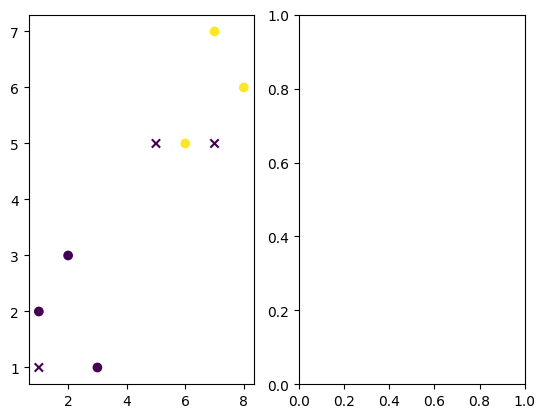

Predictions: [1 1 1]


In [18]:
# Example usage
if __name__ == "__main__":
    # Sample dataset
    X_train = np.array([[1, 2],
                        [2, 3],
                        [3, 1],
                        [6, 5],
                        [7, 7],
                        [8, 6]])
    
    y_train = np.array([0, 0, 0, 1, 1, 1])  # Labels for the dataset
    y_train = np.where(y_train == 0, -1, 1)  # Convert labels to -1 and 1

    # Create and fit the SVM model
    svm = SVM(learning_rate=0.01, regularization_strength=1e-3, num_iters=1000)
    svm.fit(X_train, y_train)

    # Sample test data
    X_test = np.array([[1, 1], [5, 5], [7, 5]])
    predictions = svm.predict(X_test)

    # visualizing training datapoints
    fig, ax = plt.subplots(1, 2)
    ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    ax[0].scatter(X_test[:, 0], X_test[:, 1], c=predictions, marker='x')
    plt.show()

    print("Predictions:", predictions)


# Custom 